# Intermediate Data Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('owid-covid-data.csv', index_col=0)
df= df[((df.location == 'United States') | (df.location == 'India'))]
df= df[((df.date > '2020-12-02') & (df.date < '2020-12-08'))]
df.head(1)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,
IND,Asia,India,2020-12-03,9571559.0,36595.0,37396.0,139188.0,540.0,496.143,6935.89,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


# Intro to Seaborn

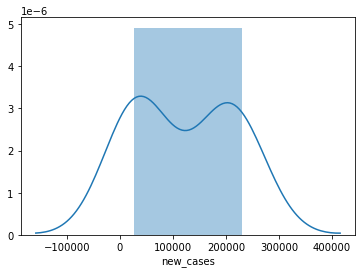

In [5]:
#histogram
sns.distplot(df.new_cases)

# Using Distribution Plot

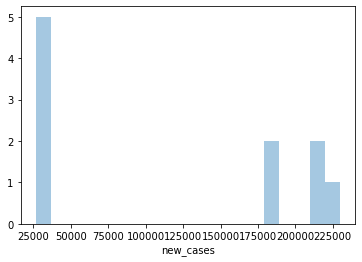

In [6]:
sns.distplot(df['new_cases'],
             kde=False,
             bins=20)

# Display the plot
plt.show()

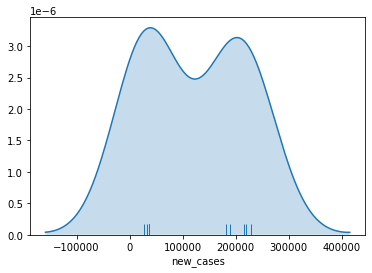

In [7]:
# Create a distplot of the Award Amount
sns.distplot(df.new_cases,
             hist=False,
             rug=True,
             kde_kws={'shade':True})

# Plot the results
plt.show()

# Regression Plot

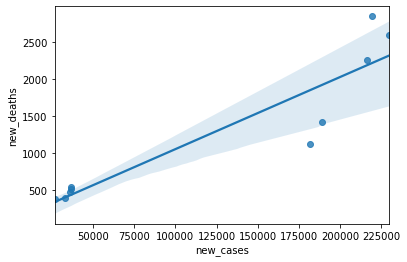

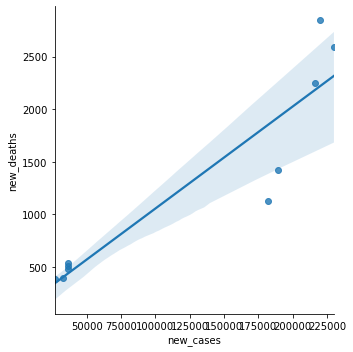

In [8]:
sns.regplot(x='new_cases', y='new_deaths', data=df)
sns.lmplot(x= 'new_cases', y='new_deaths', data=df)
#plt.show()

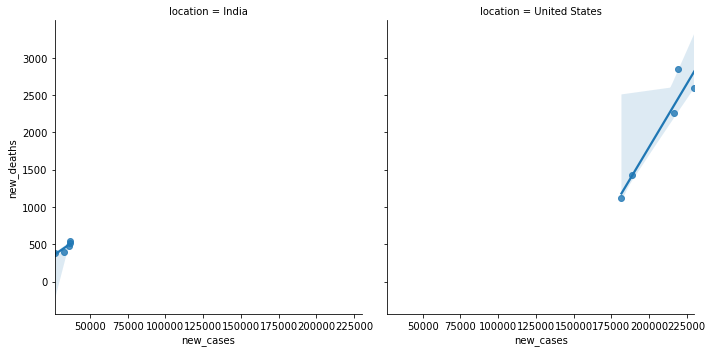

In [9]:
sns.lmplot(x= 'new_cases', y='new_deaths', data=df,col='location')

# Seaborn Style

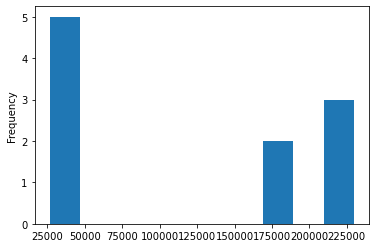

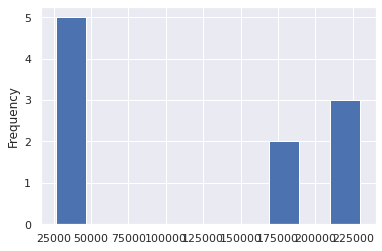

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot the pandas histogram
df['new_cases'].plot.hist()
plt.show()
plt.clf()

# Set the default seaborn style
sns.set()

# Plot the pandas histogram again
df['new_cases'].plot.hist()
plt.show()
plt.clf()

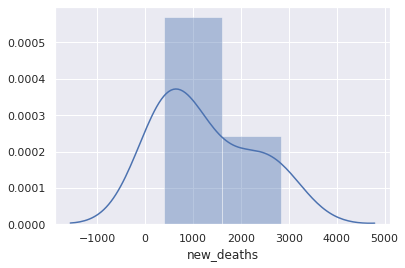

<Figure size 432x288 with 0 Axes>

In [11]:
sns.distplot(df.new_deaths)
sns.set_style('whitegrid')
plt.show()
plt.clf()

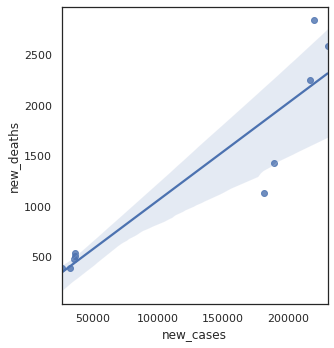

<Figure size 432x288 with 0 Axes>

In [12]:
# Set the style to white
sns.set_style('white')

# Create a regression plot
sns.lmplot(x='new_cases', y='new_deaths', data=df)

# Remove the spines, sns.despine changes the boxes top=False adds line on top
sns.despine(top=False, right=False)

# Show the plot and clear the figure
plt.show()
plt.clf()

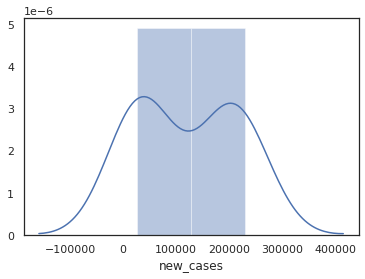

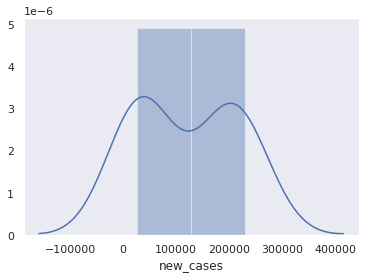

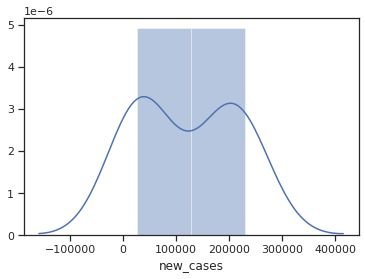

In [13]:
for style in ['white', 'dark', 'ticks']:
    sns.set_style(style)
    sns.distplot(df.new_cases)
    plt.show()

# Colors of Seaborn

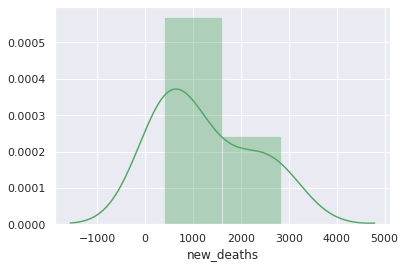

In [14]:
sns.set(color_codes=True)
sns.distplot(df.new_deaths, color='g')

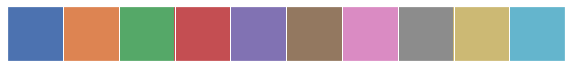

In [15]:
sns.palplot(sns.color_palette())

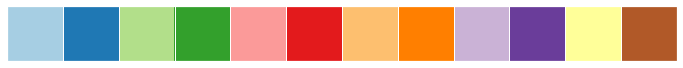

In [16]:
sns.palplot(sns.color_palette('Paired',12))

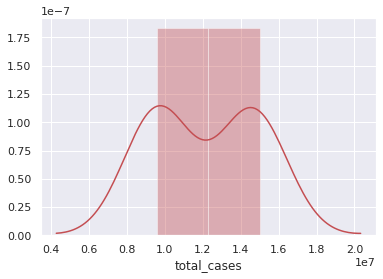

In [17]:
# Set style, enable color code, and create a magenta distplot
sns.set(color_codes=True)
sns.distplot(df['total_cases'], color='r')

# Show the plot
plt.show()

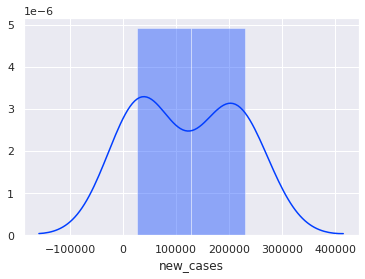

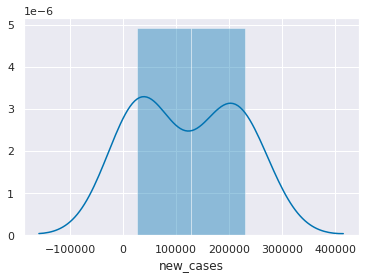

<Figure size 432x288 with 0 Axes>

In [18]:
# Loop through differences between bright and colorblind palettes
for p in ['bright', 'colorblind']:
    sns.set_palette(p)
    sns.distplot(df['new_cases'])
    plt.show()
    
    # Clear the plots    
    plt.clf()

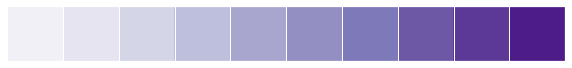

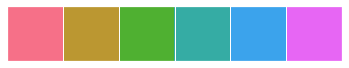

In [19]:
sns.palplot(sns.color_palette('Purples', 10))
sns.palplot(sns.color_palette('husl', 6))

# Customizing with Matplotlib

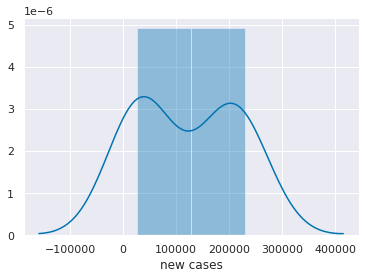

In [20]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of data
sns.distplot(df['new_cases'], ax=ax)

# Create a more descriptive x axis label
ax.set(xlabel="new cases")

# Show the plot
plt.show()

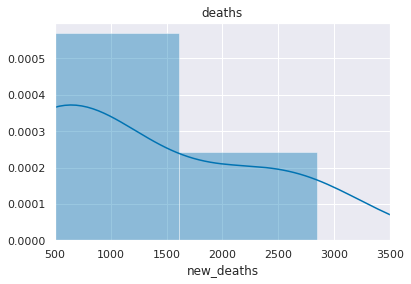

In [21]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of 1 bedroom rents
sns.distplot(df.new_deaths, ax=ax)

# Modify the properties of the plot
ax.set(xlabel="new_deaths",
       xlim=(500,3500),
       title="deaths")

# Display the plot
plt.show()

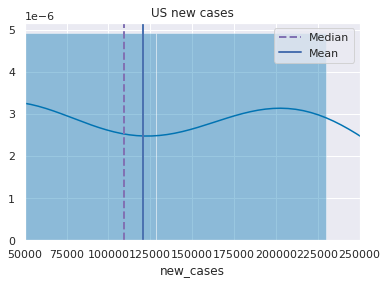

In [22]:
# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.distplot(df.new_cases, ax=ax)

# Customize the labels and limits
ax.set(xlabel="new_cases", xlim=(50000, 250000), title="US new cases")

# Add vertical lines for the median and mean
ax.axvline(x=df.new_cases.median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=df.new_cases.mean(), color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

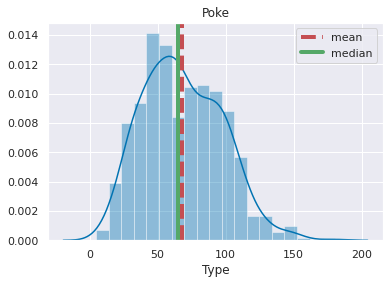

In [23]:
d= pd.read_csv('pokemon_data.csv')
fig, ax = plt.subplots()
sns.distplot(d.Speed, ax=ax)
ax.set(xlabel='Type', title='Poke')
ax.axvline(d.Speed.mean(), label='mean', linestyle='--', color='r', linewidth=4)
ax.axvline(d.Speed.median(), label='median', linestyle='-', color='g', linewidth=4)
ax.legend()
plt.show()

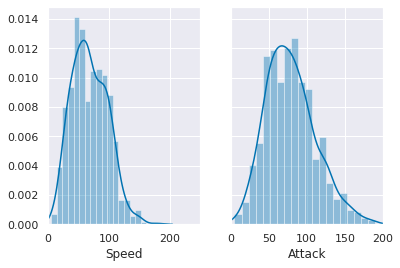

In [24]:
# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.distplot(d['Speed'], ax=ax0)
ax0.set(xlabel="Speed", xlim=(0,250))

# Plot the distribution of 2 bedroom apartments on ax1
sns.distplot(d['Attack'], ax=ax1)
ax1.set(xlabel="Attack", xlim=(0,200))

# Display the plot
plt.show()

# Categorical Plot Types

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

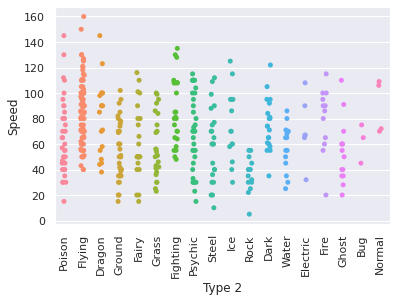

In [25]:
#strip plot
sns.stripplot(data=d, x='Type 2', y='Speed', jitter=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

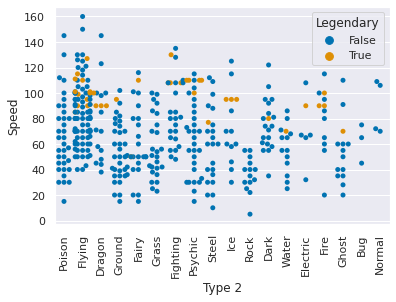

In [26]:
#swarmplot
sns.swarmplot(data=d, x= 'Type 2', y='Speed', hue='Legendary')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

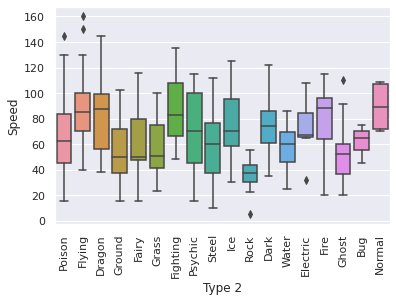

In [27]:
#BOXPLOT
sns.boxplot(x='Type 2', y='Speed', data=d)
plt.xticks(rotation=90)

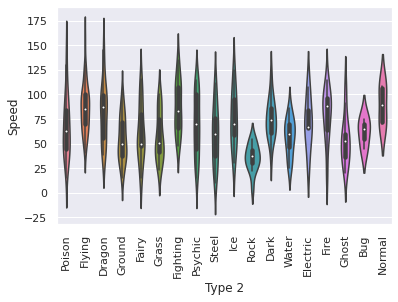

<Figure size 432x288 with 0 Axes>

In [28]:
# Create a violinplot with the husl palette
sns.violinplot(data=d,
         x='Type 2',
         y='Speed',
         palette='husl')
plt.xticks(rotation=90)
plt.show()
plt.clf()

/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:2613: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

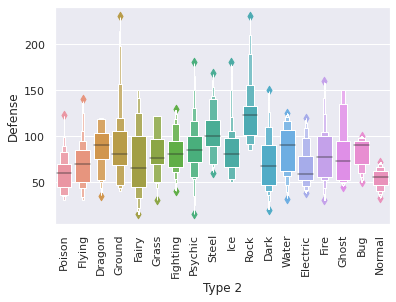

In [29]:
#LVPLOT
sns.lvplot(x='Type 2', y='Defense', data=d)
plt.xticks(rotation=90)

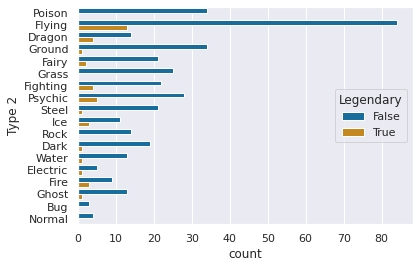

In [30]:
#Countplot
sns.countplot(y='Type 2', data=d, hue='Legendary')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

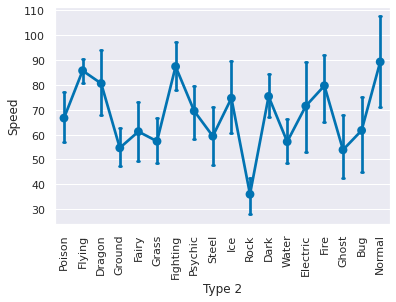

In [31]:
#POINT PLOT
sns.pointplot(x='Type 2', y='Speed', data=d, capsize=.1)
plt.xticks(rotation=90)

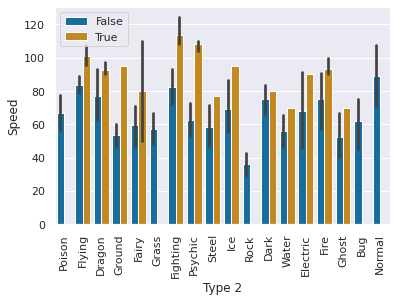

In [32]:
#BAR PLOT
sns.barplot(x='Type 2', y='Speed', data=d, hue='Legendary')
plt.xticks(rotation=90)
plt.legend()

# Regression Plots

(0.0, 7.0)

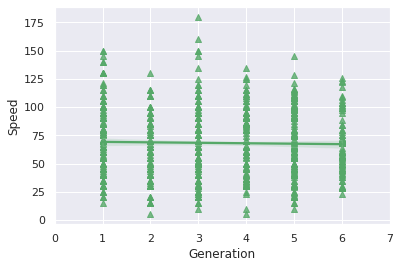

In [33]:
# Reg Plot
sns.regplot(data=d, x='Generation', y='Speed', marker='^', color='g')
plt.xlim(0,7)

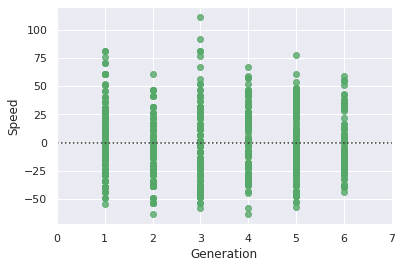

<Figure size 432x288 with 0 Axes>

In [34]:
# Display the residual plot
sns.residplot(data=d,
          y='Speed',
          x="Generation",
          color='g')
plt.xlim(0,7)

plt.show()
plt.clf()

(0.0, 7.0)

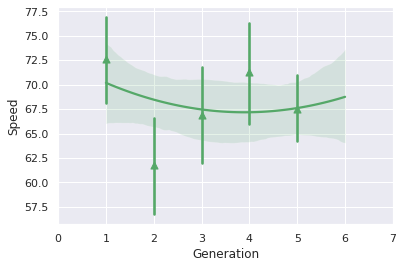

In [35]:
sns.regplot(data=d, x='Generation', y='Speed', marker='^', color='g', x_bins=5, order=2)
plt.xlim(0,7)

# Matrix Plot

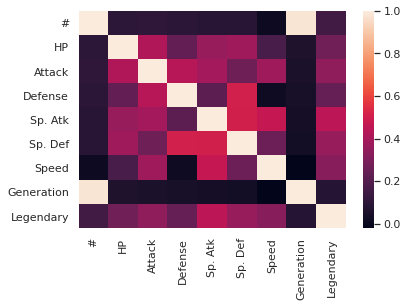

In [36]:
sns.heatmap(d.corr())

new_deaths  385.0   391.0   482.0   512.0   540.0   1127.0  1426.0  2253.0  \
new_cases                                                                    
26567.0          1       0       0       0       0       0       0       0   
32981.0          0       1       0       0       0       0       0       0   
36011.0          0       0       1       0       0       0       0       0   
36595.0          0       0       0       0       1       0       0       0   
36652.0          0       0       0       1       0       0       0       0   
181709.0         0       0       0       0       0       1       0       0   
188936.0         0       0       0       0       0       0       1       0   
216320.0         0       0       0       0       0       0       0       1   
219493.0         0       0       0       0       0       0       0       0   
229938.0         0       0       0       0       0       0       0       0   

new_deaths  2590.0  2844.0  
new_cases                   
26567

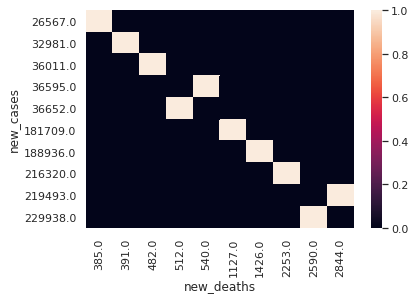

In [37]:
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df["new_cases"], df["new_deaths"])
print(pd_crosstab)

# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

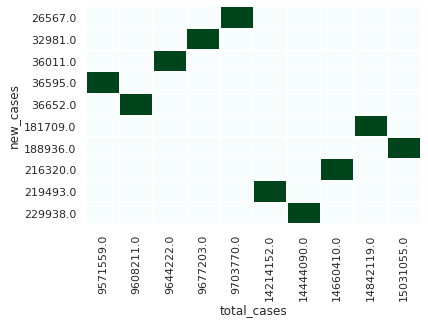

<Figure size 432x288 with 0 Axes>

In [38]:
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(df["new_cases"], df["total_cases"])

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#Show the plot
plt.show()
plt.clf()

# FacetGrid, Factorplot and Lmplot

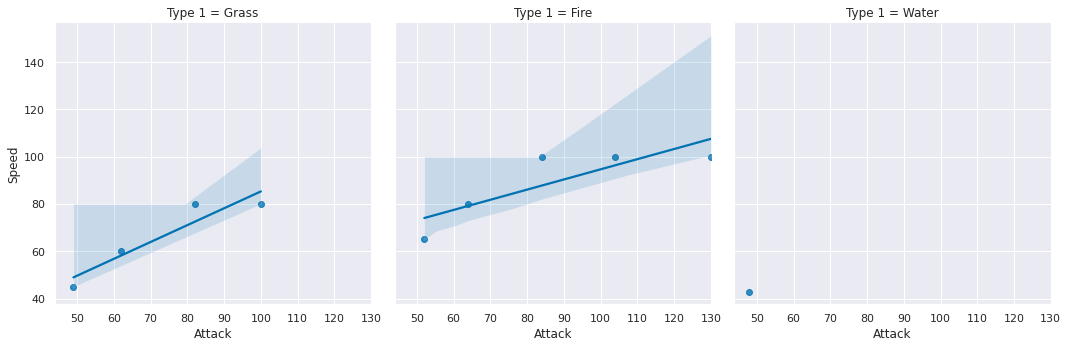

In [39]:
d.head()
d1= d[((d['#'] >=1) & (d['#'] <=7))]
sns.lmplot(x='Attack', y='Speed', col='Type 1', data=d1)

# PairGrid and pairplot

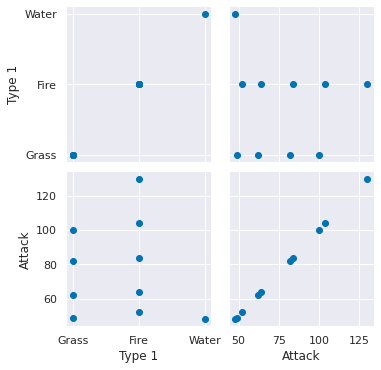

<Figure size 432x288 with 0 Axes>

In [41]:
g = sns.PairGrid(d1, vars=['Type 1', 'Attack'])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

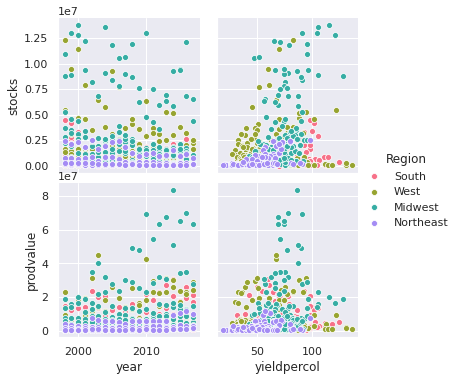

<Figure size 432x288 with 0 Axes>

In [53]:
# Build a pairplot with different x and y variables
sns.pairplot(df2, x_vars=['year', 'yieldpercol'], y_vars=['stocks', 'prodvalue'], kind='scatter', hue='Region', palette='husl')
plt.show()
plt.clf()

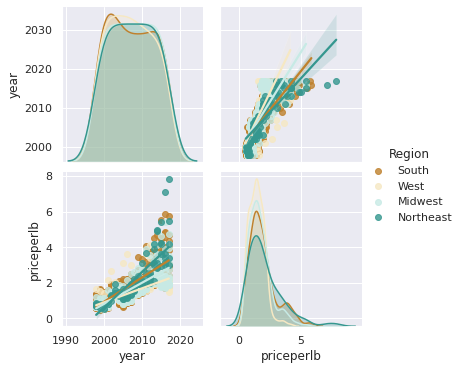

<Figure size 432x288 with 0 Axes>

In [54]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df2,
             vars=["year", "priceperlb"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

In [43]:
df2= pd.read_csv('HoneyBees.csv')

# Using JointGrid and joinplot

In [56]:
df3= pd.read_csv('loans.csv')
df3.head()

,loan_amnt,term,int_rate,grade,emp_title,emp_length,annual_inc,issue_d,loan_status,purpose,total_pymnt,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,flag
0,16000,60 months,13.08%,B,NaN,NaN,73902.0,Mar-2019,Current,credit_card,1082.50,Jun-2019,364.71,Jul-2019,Jun-2019,1
1,5000,36 months,13.08%,B,RN,2 years,110000.0,Mar-2019,Current,debt_consolidation,524.18,Jun-2019,168.67,Jul-2019,Jun-2019,1
2,20000,60 months,14.47%,C,Foreman,2 years,60000.0,Feb-2019,Current,debt_consolidation,1953.39,Jun-2019,470.26,Jul-2019,Jun-2019,1
3,21000,60 months,8.19%,A,QC Mortgage Underwriter,3 years,67000.0,Mar-2019,Current,debt_consolidation,1273.60,Jun-2019,427.72,Jul-2019,Jun-2019,1
4,8800,36 months,6.46%,A,Mate,6 years,55000.0,Jan-2019,Current,debt_consolidation,1071.92,May-2019,269.56,Jul-2019,Jun-2019,1


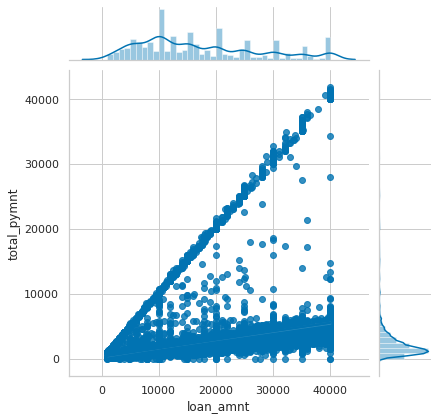

<Figure size 432x288 with 0 Axes>

In [63]:
#JointGrid
sns.set_style('whitegrid')
g= sns.JointGrid(data=df3, y='total_pymnt', x='loan_amnt')
g.plot(sns.regplot, sns.distplot)
plt.show()
plt.clf()

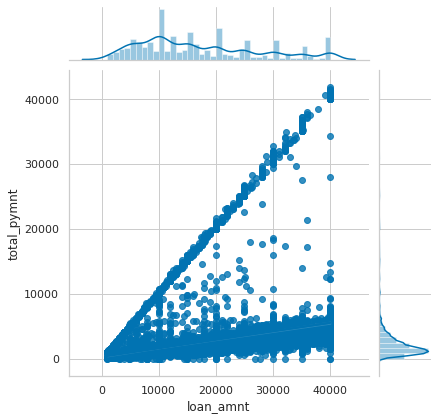

<Figure size 432x288 with 0 Axes>

In [64]:
# Joint plot
sns.jointplot(data=df3, x='loan_amnt', y='total_pymnt', kind='reg')
plt.show()
plt.clf()

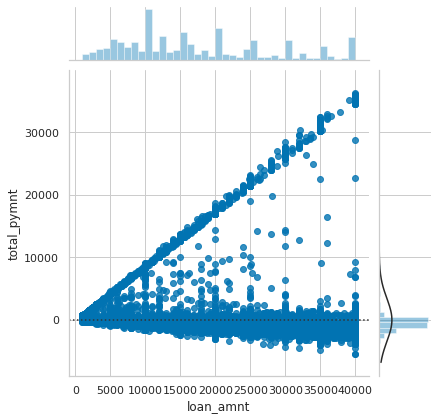

<Figure size 432x288 with 0 Axes>

In [74]:
sns.jointplot(data=df3, x='loan_amnt', y='total_pymnt', kind='reside', order=2)
plt.show()
plt.clf()

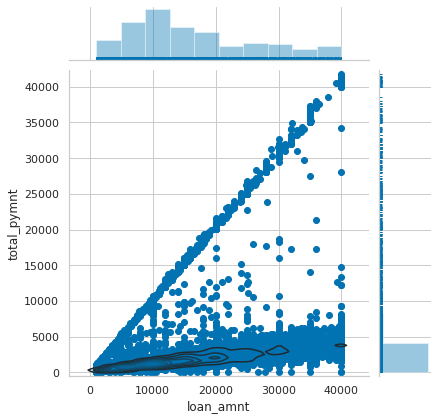

<Figure size 432x288 with 0 Axes>

In [76]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x="loan_amnt",
             y="total_pymnt",
             kind='scatter',
             data=df3,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf()

# When to Use which Seaborn plot

displot() is best place to start for analysis

rugplot() and kdeplot() alternatives

lmplot() performs regression analysis supports facetting

Categorical Plots good to examine distrubtion of variables 

pairplot() and jointplot() useful to see how two or more variable interact with each other 